# Trees

Table of contents

Chapter 1.  Decision trees

✔ Chapter 2. Tree ensembles

# Chapter 2-1. Use scikit-learn to implement Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Define the RandomForest model

The following is the hyper-parameters

*   n_estimators: the number of trees
*   criterion: when choosing the node (e.g., gini impurity and entropy)
*   max_depth:  the maximum depth of the tree 
*   min_samples_split: the minimum number of remaining samples for the split
*   max_features: the number of features to be considered. we learned that the typical number will be sqrt(# total features)







load the breast cancer dataset



*   Consist of the following 30 features (and compute mean, stadard error (std / sqrt(N)), and the worst case)

  a) radius (mean of distances from center to points on the perimeter)

  b) texture (standard deviation of gray-scale values)

  c) perimeter

  d) area

  e) smoothness (local variation in radius lengths)

  f) compactness (perimeter^2 / area - 1.0)

  g) concavity (severity of concave portions of the contour)

  h) concave points (number of concave portions of the contour)

  i) symmetry

  j) fractal dimension ("coastline approximation" - 1)



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [ ]:
import pandas as pd

df = pd.DataFrame(X_train)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
2,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
3,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
4,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974


In [ ]:
X.shape

(569, 30)

In [ ]:
clf = RandomForestClassifier(n_estimators=20, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=0)

Use k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print(sum(scores)/len(scores))

[0.93859649 0.92982456 0.98245614 0.96491228 0.97345133]
0.9578481602235678


What if we use 100 trees in the ensemble?

In [ ]:
clf2 = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=0)

In [ ]:
scores2 = cross_val_score(clf2, X, y, cv=5)
print(scores2)
print(sum(scores2)/len(scores2))

[0.94736842 0.92982456 0.99122807 0.97368421 0.97345133]
0.9631113181183046


What if we use 1000 trees in the ensemble?

In [ ]:
clf3 = RandomForestClassifier(n_estimators=1000, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=0)
scores3 = cross_val_score(clf3, X, y, cv=5)
print(scores3)
print(sum(scores3)/len(scores3))

[0.93859649 0.95614035 0.99122807 0.97368421 0.97345133]
0.9666200900481293


Compute the feature importance for each feature

In [ ]:
clf3.fit(X_train, y_train)

# feature importance is computed using the gini impurity (total decerase in node impurity averaged over all trees in the ensemble)
imp_score=clf3.feature_importances_

In [ ]:
#pick top 5 features
import numpy as np

# np.argsort returns "indices" in ascending order
# X[::-1]: reverse X
top_indices=np.argsort(imp_score)[::-1][:5]
print(top_indices)
top_feature_names=[data.feature_names[int(x)] for x in top_indices]
print(top_feature_names)

[22 27 20 23  7]
['worst perimeter', 'worst concave points', 'worst radius', 'worst area', 'mean concave points']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

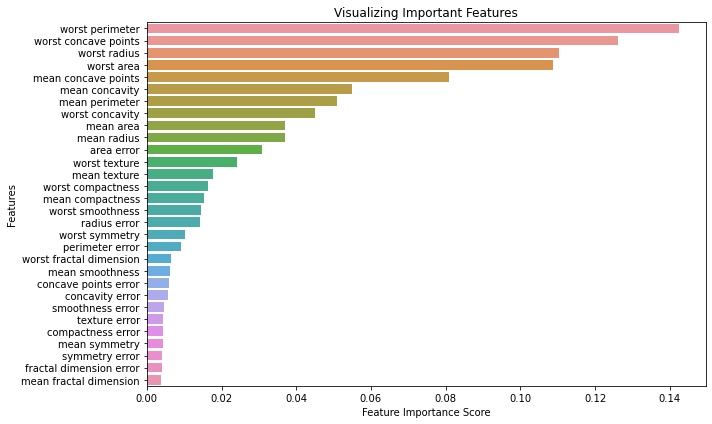

In [ ]:
feature_imp = pd.Series(clf3.feature_importances_, index=data.feature_names).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()